## Observations and Insights 

In [ ]:
#Three observations 
# 1) On average, mice who were on Ramicane had smaller tumors.
# 2) Over time mice who were on Capomulin had their tumors reduced from 45 mm3 to about 20 mm3.
# 3) Mice on Capomulin that had larger tumors also weighed more.

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata)
print(study_results)

# Combine the data into a single dataset

mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [2]:
# Checking the number of mice.
number_of_mice = len(pd.unique(mouse_data_complete["Mouse ID"]))
print(number_of_mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

print(duplicate_mice)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice=duplicate_mice

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mice)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_df = len(pd.unique(clean_mice_df["Mouse ID"]))
print(number_of_mice_df)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_average = clean_mice_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']

regimen_median = clean_mice_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']

regimen_variance = clean_mice_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']

regimen_std = clean_mice_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']

regimen_sem = clean_mice_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
regimen_summary = pd.DataFrame({
    "Average": regimen_average,
    "Median": regimen_median,
    "Variance": regimen_variance,
    "STD": regimen_std,
    "SEM": regimen_sem})

print(regimen_summary)


                Average     Median   Variance       STD       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#df.agg(['sum', 'min'])

regimen_summary2 = clean_mice_df.groupby(['Drug Regimen']).agg(['mean', 'median', 'var', 'std','sem'])['Tumor Volume (mm3)']

/var/folders/2c/v883w4nx4rzby0m4xp1grjxm0000gn/T/ipykernel_97783/1856953356.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  regimen_summary2 = clean_mice_df.groupby(['Drug Regimen']).agg(['mean', 'median', 'var', 'std','sem'])['Tumor Volume (mm3)']


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

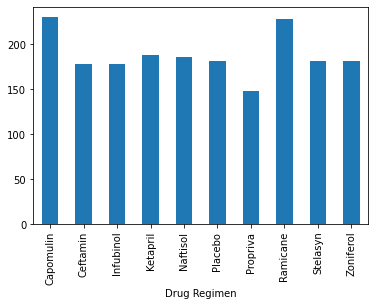

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_bar_df = clean_mice_df.groupby(['Drug Regimen']).count()['Mouse ID']
mice_bar_pd = mice_bar_df.plot.bar(x='Drug Regimen', y='Mouse Count')

mice_bar_pd

Text(0, 0.5, 'Mouse Count')

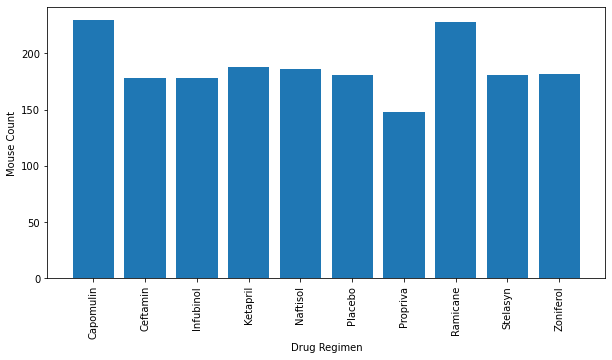

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_bar_df = clean_mice_df.groupby(['Drug Regimen']).count()['Mouse ID']
x_axis = np.arange(len(mice_bar_df))
number_of_Mice = mice_bar_df
tick_locations=[0,1,2,3,4,5,6,7,8,9]

fig = plt.figure (figsize = (10, 5))
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.bar(x_axis, mice_bar_df)
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse Count')



Text(0.5, 1.0, 'Female v. Male Count')

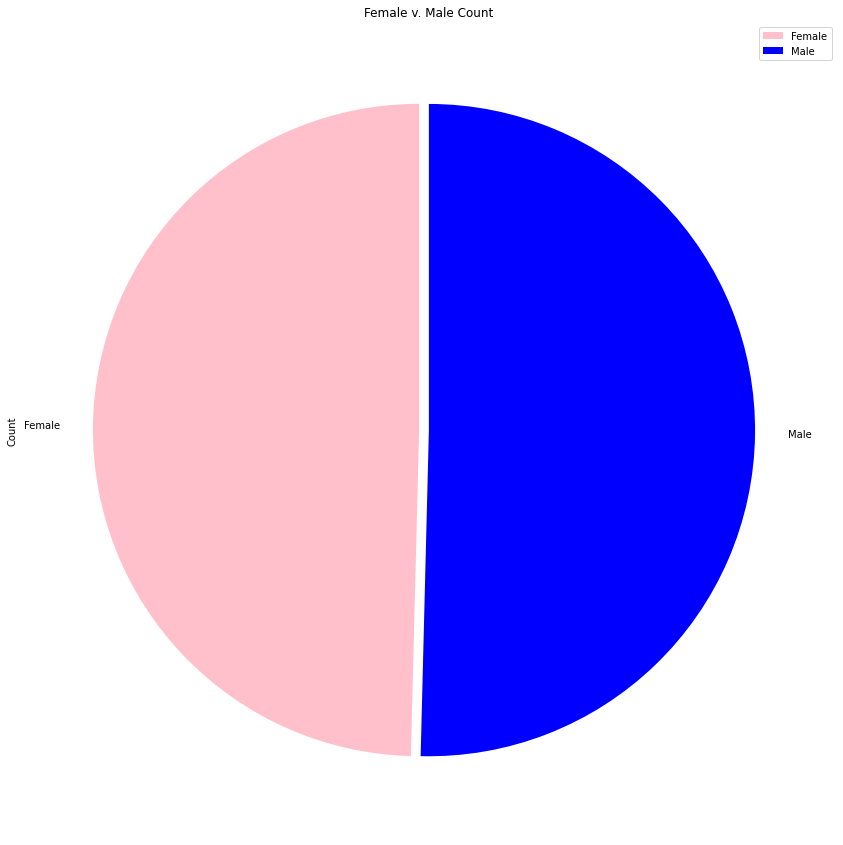

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_of_mice = pd.DataFrame(clean_mice_df.groupby(['Mouse ID','Sex']).size())
gender_of_mice

gender_count=pd.DataFrame(gender_of_mice.groupby(["Sex"]).count())
gender_count.columns = ["Count"]

gender_count['percent of gender']= round((gender_count["Count"]/gender_count["Count"].sum())*100,2)
gender_count

colors = ['pink','blue']
gender_count.plot.pie(y='Count',figsize=(15,15),colors = colors, startangle=90, explode =(.03,0))
plt.title("Female v. Male Count")




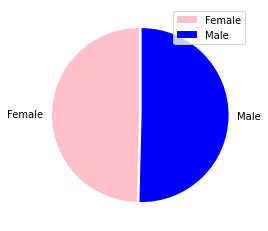

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
lables = ['Female','Male']
colors = ['pink','blue']
plt.pie(gender_count['percent of gender'],labels = lables,colors = colors,startangle = 90,explode =(.03,0))
plt.legend()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin"]
Ramicane = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ramicane"]
Infubinol = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Infubinol"]
Ceftamin = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ceftamin"]



# Start by getting the last (greatest) timepoint for each mouse

Capomulin_last_timepoint = Capomulin.groupby('Mouse ID').max()['Timepoint']
Ramicane_last_timepoint = Ramicane.groupby('Mouse ID').max()['Timepoint']
Infubinol_last_timepoint = Infubinol.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last_timepoint = Ceftamin.groupby('Mouse ID').max()['Timepoint']



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Capomulin_data_complete = pd.merge(Capomulin, Capomulin_last_timepoint, how="left", on=["Mouse ID", "Timepoint"])
Ramicane_data_complete = pd.merge(Ramicane, Ramicane_last_timepoint, how="left", on=["Mouse ID", "Timepoint"])
Infubinol_data_complete = pd.merge(Infubinol, Infubinol_last_timepoint, how="left", on=["Mouse ID", "Timepoint"])
Ceftamin_data_complete = pd.merge(Ceftamin, Ceftamin_last_timepoint, how="left", on=["Mouse ID", "Timepoint"])


In [14]:


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin_tumors = Capomulin_data_complete["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

if lowerq < lower_bound:
    print("Outlier")
else:
    print("Not an outlier")

if upperq > upper_bound:
    print("Outlier")
else:
    print("Not an outlier")
    
Ramicane_tumors = Ramicane["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

if lowerq < lower_bound:
    print("Outlier")
else:
    print("Not an outlier")

if upperq > upper_bound:
    print("Outlier")
else:
    print("Not an outlier")


Infubinol_tumors = Infubinol["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

if lowerq < lower_bound:
    print("Outlier")
else:
    print("Not an outlier")

if upperq > upper_bound:
    print("Outlier")
else:
    print("Not an outlier")
    
Ceftamin_tumors = Ceftamin["Tumor Volume (mm3)"]

quartiles =Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

if lowerq < lower_bound:
    print("Outlier")
else:
    print("Not an outlier")

if upperq > upper_bound:
    print("Outlier")
else:
    print("Not an outlier")

    
    

Not an outlier
Not an outlier
Not an outlier
Not an outlier
Not an outlier
Not an outlier
Not an outlier
Not an outlier


(10.0, 80.0)

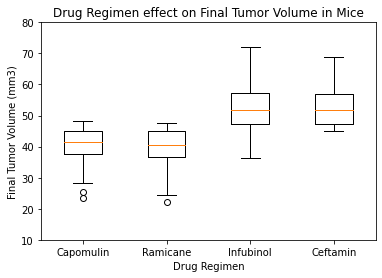

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Final_Tumor_Vol = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Drug= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

plt.boxplot(Final_Tumor_Vol, labels=Drug )
plt.title('Drug Regimen effect on Final Tumor Volume in Mice')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

plt.ylim(10, 80)


## Line and Scatter Plots

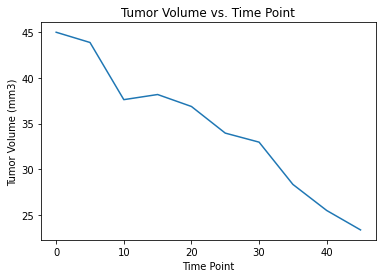

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin.head()
single_mouse=Capomulin.loc[Capomulin["Mouse ID"] == "s185"]
plt.plot(single_mouse['Timepoint'],single_mouse['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Time Point' )
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

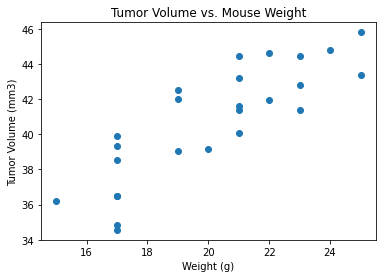

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin.head()
Average_Capomulin =Capomulin.groupby(['Mouse ID']).mean()
plt.scatter(Average_Capomulin['Weight (g)'],Average_Capomulin['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Mouse Weight' )
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

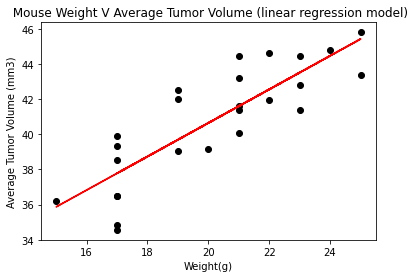

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Correlation = round(Average_Capomulin['Weight (g)'].corr(Average_Capomulin['Tumor Volume (mm3)']),2)
Correlation

#linear regression model 
x_values = Average_Capomulin['Weight (g)']
y_values = Average_Capomulin['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_values, y_values)


regression_line = slope * x_values + intercept

plt.scatter(x_values,y_values,color = "black")
plt.plot(x_values,regression_line,color = "red")
plt.title(' Mouse Weight V Average Tumor Volume (linear regression model)')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
